In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [2]:
# generate 20 data points
N = 20


#random data on x-axis
x= np.random.rand(N)*10-5

y = 0.5*x -1+ np.random.rand(N)

In [3]:
x

array([ 2.33134102, -4.28874742, -1.51942676, -1.09131894,  3.0188224 ,
       -4.25228553,  0.42565859,  4.81413173, -2.53539718,  1.2277586 ,
        4.01640241, -0.5837396 ,  3.7582213 , -3.50832282,  1.51525378,
       -3.29759933,  2.32457157, -2.84375386, -2.362882  ,  1.48834613])

In [4]:
y

array([ 0.94342941, -2.22587464, -1.13181848, -0.93746885,  0.84893062,
       -3.12024619, -0.46790898,  2.22470008, -1.27954567,  0.36282475,
        1.8719593 , -0.94911044,  1.20579266, -2.59016657,  0.23573946,
       -2.52405105,  0.21086614, -1.60030302, -1.93661818,  0.48096679])

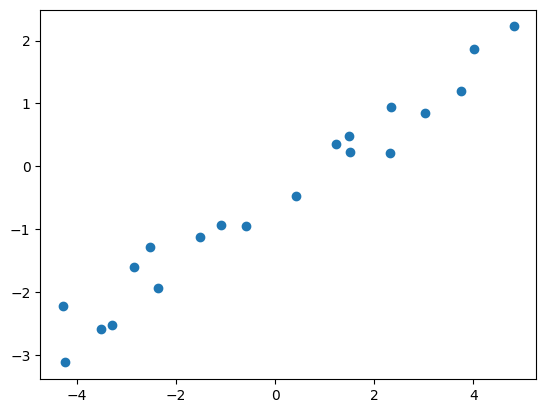

In [5]:
plt.scatter(x,y)

In [6]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = x.reshape(N, 1)
Y = y.reshape(N, 1)

In [7]:
def Gradient(m,b) :
    
    grad_m =0; grad_b = 0;

    for i in range(N) :
        grad_m += -X[i]*(Y[i]- (m*X[i]+b))
        grad_b += - (Y[i]- (m*X[i]+b) )

    return grad_m, grad_b

Gradient(-1,-1)

(array([-247.04159165]), array([-8.25913122]))

In [8]:
n_epochs      = 1000
learning_rate = 0.01
theta         = np.random.rand(2,1)

for i in range(n_epochs) :
    grad_m, grad_b = Gradient(theta[0], theta[1])
    theta[0] -= learning_rate*grad_m
    theta[1] -= learning_rate*grad_b


theta 

array([[ 0.51823469],
       [-0.48357833]])

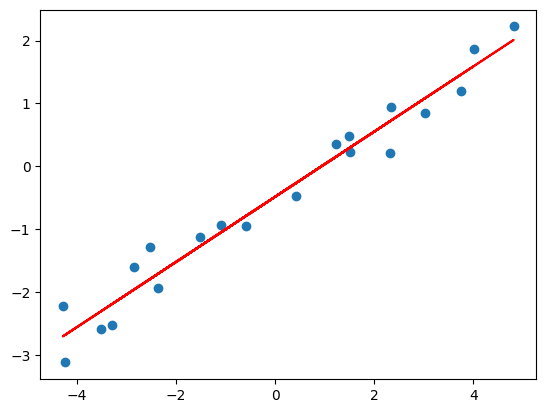

In [9]:
predict = theta[0]*X + theta[1]
plt.plot(X, predict, 'r')
plt.scatter(x,y)

In [10]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [11]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [12]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [13]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 11.2086
Epoch 2/30, Loss: 0.4693
Epoch 3/30, Loss: 0.1050
Epoch 4/30, Loss: 0.0922
Epoch 5/30, Loss: 0.0914
Epoch 6/30, Loss: 0.0911
Epoch 7/30, Loss: 0.0908
Epoch 8/30, Loss: 0.0906
Epoch 9/30, Loss: 0.0905
Epoch 10/30, Loss: 0.0903
Epoch 11/30, Loss: 0.0902
Epoch 12/30, Loss: 0.0901
Epoch 13/30, Loss: 0.0901
Epoch 14/30, Loss: 0.0900
Epoch 15/30, Loss: 0.0899
Epoch 16/30, Loss: 0.0899
Epoch 17/30, Loss: 0.0899
Epoch 18/30, Loss: 0.0899
Epoch 19/30, Loss: 0.0898
Epoch 20/30, Loss: 0.0898
Epoch 21/30, Loss: 0.0898
Epoch 22/30, Loss: 0.0898
Epoch 23/30, Loss: 0.0898
Epoch 24/30, Loss: 0.0898
Epoch 25/30, Loss: 0.0898
Epoch 26/30, Loss: 0.0898
Epoch 27/30, Loss: 0.0898
Epoch 28/30, Loss: 0.0898
Epoch 29/30, Loss: 0.0898
Epoch 30/30, Loss: 0.0898


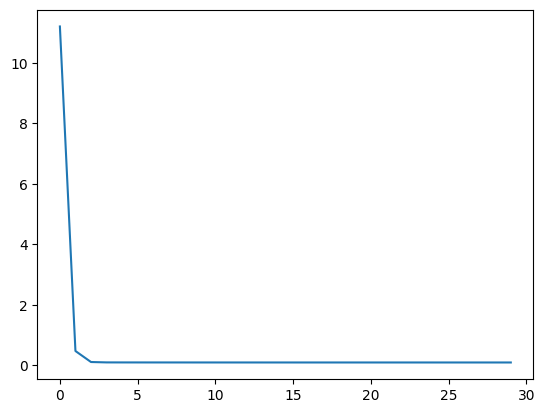

In [14]:
# Plot the loss per iteration
plt.plot(losses);

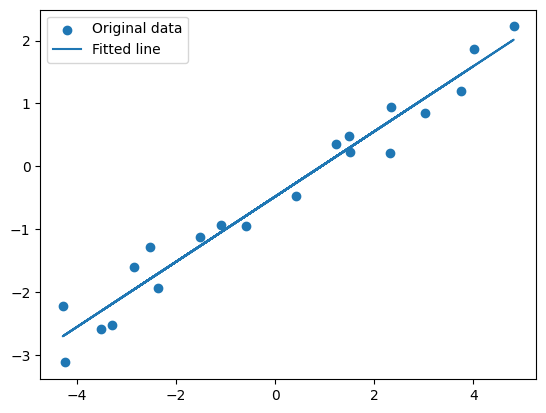

In [17]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [16]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
m = model.weight.data.numpy()
b = model.bias.data.numpy()
print(m, b)

[[0.51825994]] [-0.48092768]
